# 지수별 클러스터링

'세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'

`'세대당공원면적'-'접근성지수'`

생성한 각 지수를 군집화해 최적의 행정동을 추출

jupyter/F. 데이터 마이닝/02. Sklearn/13-군집.ipynb

## #01. 패키지

In [20]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame

# 군집을 위한 패키지
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [3]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

,시도명,시군구코드,시군구명,행정동코드,행정동코드수정,읍면동명,생성일자,말소일자,지하철역수,의료기관수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,NaN,NaN,11.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,NaN,2.0,75.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,서울특별시,11110,종로구,1111054000,11110540,삼청동,19880423,NaN,NaN,11.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,서울특별시,11110,종로구,1111055000,11110550,부암동,19880423,NaN,NaN,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,서울특별시,11110,종로구,1111056000,11110560,평창동,19880423,NaN,NaN,15.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


## #03. 데이터 살펴보기

In [4]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '행정동코드수정', '읍면동명', '생성일자', '말소일자',
       '지하철역수', '의료기관수', '사회복지시설수', '계(명)', '면적', '구성비', '행정동별공원수', '공공체육시설수',
       '문화시설수', '학교수', '사업체수', '보육시설', '주차장개소', '주차장면수', '하천및한강여부', '아동인구',
       '노인인구', '장애인인구', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수'],
      dtype='object')

In [30]:
tmp = origin.drop(['시도명','시군구코드','시군구명','행정동코드','읍면동명', '행정동코드수정', '읍면동명', '생성일자', '말소일자'], axis=1)
tmp.head()

,지하철역수,의료기관수,사회복지시설수,계(명),면적,구성비,행정동별공원수,공공체육시설수,문화시설수,학교수,...,주차장개소,주차장면수,하천및한강여부,아동인구,노인인구,장애인인구,세대당공원면적,교통약자지수,시민문화지수,접근성지수
0,NaN,11.0,5.0,11700,2.57,0.42,2.0,10.0,6.0,8.0,...,668,4592,무,612.0,2154,437,337.55,0.883757,12.240301,0.978054
1,2.0,75.0,1.0,9362,1.23,0.20,3.0,8.0,13.0,2.0,...,362,12605,무,488.0,1808,267,60.79,0.952852,35.399526,2.354708
2,NaN,11.0,NaN,2576,1.49,0.25,1.0,2.0,31.0,2.0,...,343,2237,무,108.0,626,110,956.51,0.715943,39.839834,2.266277
3,NaN,4.0,4.0,9377,2.27,0.38,1.0,5.0,5.0,4.0,...,596,3533,유,385.0,1814,311,0.00,0.710363,5.777047,1.081284
4,NaN,15.0,11.0,17658,8.87,1.47,NaN,5.0,11.0,4.0,...,1617,9390,유,1033.0,3495,491,1.14,0.714284,2.630924,1.576024


In [31]:
tmp.isnull().sum()

지하철역수      222
의료기관수        5
사회복지시설수     29
계(명)         0
면적           0
구성비          0
행정동별공원수    317
공공체육시설수    139
문화시설수      182
학교수         35
사업체수         5
보육시설         0
주차장개소        0
주차장면수        0
하천및한강여부      0
아동인구         2
노인인구         0
장애인인구        0
세대당공원면적      3
교통약자지수       0
시민문화지수       0
접근성지수        0
dtype: int64

In [32]:
tmp = tmp.fillna(0)
tmp.isnull().sum()

지하철역수      0
의료기관수      0
사회복지시설수    0
계(명)       0
면적         0
구성비        0
행정동별공원수    0
공공체육시설수    0
문화시설수      0
학교수        0
사업체수       0
보육시설       0
주차장개소      0
주차장면수      0
하천및한강여부    0
아동인구       0
노인인구       0
장애인인구      0
세대당공원면적    0
교통약자지수     0
시민문화지수     0
접근성지수      0
dtype: int64

In [34]:
tmp = tmp['하천및한강여부'].map({"유":1, "무":0})
tmp.head()

0    0
1    0
2    0
3    1
4    1
Name: 하천및한강여부, dtype: int64

## #04. 군집화 모델

### 모델 구현

n_clusters : 군집의 갯수, n_init : 초기 중심위치 수, random_state : 시드 값 고정(재현성)

연구 목적이 아닌 실무에서 random_state는 배제

In [35]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=777)
# 학습
kmeans.fit(tmp)
# 분류 결과
labels = kmeans.predict(tmp)
labels

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

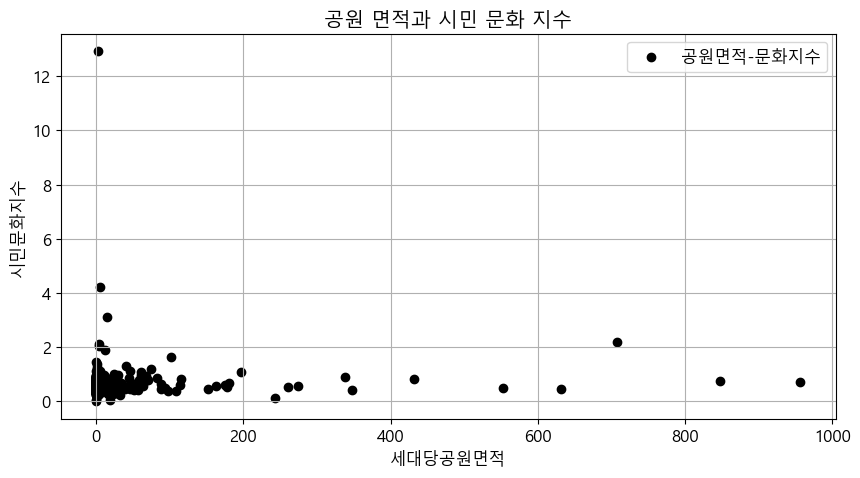

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c='black', label='공원면적-문화지수')
plt.xlabel('세대당공원면적')
plt.ylabel('시민문화지수')
plt.legend()
plt.title('공원 면적과 시민 문화 지수')
plt.grid()
plt.show()
plt.close()

### k값 결정

In [26]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)
inertia

[3583483.073374423,
 858550.6613916962,
 338088.22011216305,
 215007.72014195347,
 126880.56425657801,
 73052.73034261136,
 54856.302635067164,
 40453.164389384125,
 31201.47608745647,
 25217.29600044785]

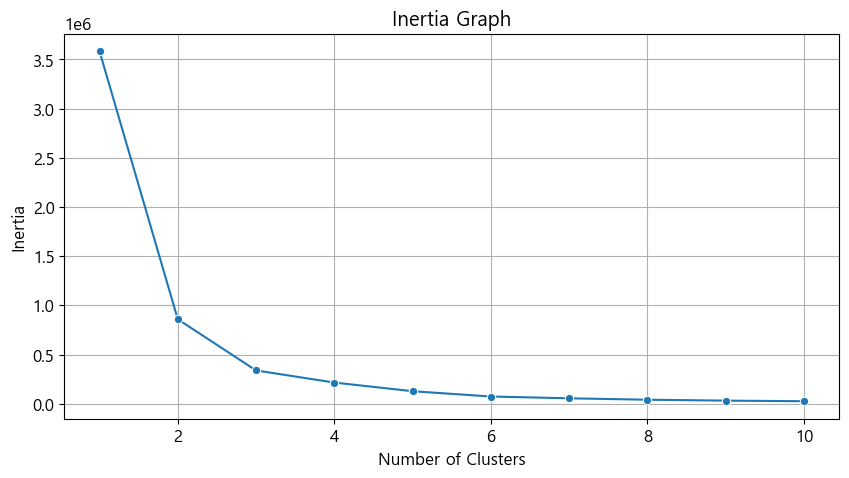

In [27]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(1,11), y=inertia, marker='o')
plt.title("Inertia Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.grid()
plt.show()
plt.close()

> 4이후로 감소폭이 크지 않으므로 k=4로 결정

## #05. K-means clustering

In [13]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 n개로 나누겠다
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
0,청운효자동,337.55,0.883757,12.240301,0.978054,2
1,사직동,60.79,0.952852,35.399526,2.354708,3
2,삼청동,956.51,0.715943,39.839834,2.266277,1
3,부암동,0.00,0.710363,5.777047,1.081284,0
4,평창동,1.14,0.714284,2.630924,1.576024,0
...,...,...,...,...,...,...
421,성내제2동,0.18,0.487564,-19.819594,1.947349,0
422,성내제3동,0.35,0.719540,-21.968657,1.275197,0
423,길동,4.11,0.548756,-5.462606,0.837081,0
424,둔촌제1동,0.00,0.000000,-17.926507,0.000000,0


In [14]:
tmp.columns

Index(['읍면동명', '세대당공원면적', '교통약자지수', '시민문화지수', '접근성지수', '클러스터_수치'], dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(X)
scaler.fit(X)
n_data = scaler.transform(X)

InvalidParameterError: The 'feature_range' parameter of MinMaxScaler must be an instance of 'tuple'. Got array([[3.37550000e+02, 8.83756863e-01],
       [6.07900000e+01, 9.52852017e-01],
       [9.56510000e+02, 7.15942597e-01],
       [0.00000000e+00, 7.10363385e-01],
       [1.14000000e+00, 7.14283817e-01],
       [2.16000000e+00, 3.92369176e-01],
       [2.33000000e+00, 5.10352313e-01],
       [4.84000000e+00, 2.12120537e+00],
       [1.01400000e+02, 1.62100284e+00],
       [9.80000000e-01, 1.25412316e+00],
       [4.67400000e+01, 1.12034121e+00],
       [2.29700000e+01, 4.32410299e-01],
       [0.00000000e+00, 5.78318300e-01],
       [2.96000000e+00, 2.46980504e-01],
       [1.40000000e+00, 1.86357744e-01],
       [1.54000000e+01, 5.65426329e-01],
       [1.47000000e+00, 5.08981574e-01],
       [1.48600000e+01, 3.10864313e+00],
       [0.00000000e+00, 1.44998134e+00],
       [5.70000000e+00, 4.23073341e+00],
       [1.78000000e+00, 1.20336246e+00],
       [0.00000000e+00, 3.64152491e-01],
       [1.88000000e+00, 4.88570221e-01],
       [1.25000000e+01, 1.87794473e+00],
       [0.00000000e+00, 3.02377749e-01],
       [3.30000000e-01, 4.94140408e-01],
       [1.38000000e+01, 4.32965411e-01],
       [2.60000000e-01, 3.64086541e-01],
       [3.07000000e+00, 7.02053309e-01],
       [1.36000000e+00, 4.72328087e-01],
       [1.60000000e-01, 3.50891174e-01],
       [9.54000000e+00, 8.73491186e-01],
       [2.90000000e-01, 7.80648400e-01],
       [0.00000000e+00, 2.39964753e-01],
       [9.50000000e-01, 1.36072480e+00],
       [1.11000000e+00, 4.59568070e-01],
       [2.48000000e+00, 6.67443945e-01],
       [4.30000000e-01, 6.65367810e-01],
       [4.02400000e+01, 1.31727725e+00],
       [2.80000000e-01, 5.05898703e-01],
       [1.79000000e+00, 5.07043102e-01],
       [1.24000000e+00, 3.14206692e-01],
       [1.20000000e-01, 3.87811856e-01],
       [6.10000000e-01, 8.93256768e-01],
       [1.10000000e+00, 2.79941910e-01],
       [0.00000000e+00, 4.72334443e-01],
       [2.75700000e+01, 5.66808159e-01],
       [0.00000000e+00, 3.36573549e-01],
       [4.64000000e+00, 5.02609878e-01],
       [1.26000000e+00, 8.19028240e-01],
       [2.90000000e-01, 7.12910765e-01],
       [7.10000000e-01, 5.85607208e-01],
       [0.00000000e+00, 5.18698740e-01],
       [6.70000000e-01, 3.67787153e-01],
       [3.90000000e-01, 3.66303563e-01],
       [1.21100000e+01, 5.64232972e-01],
       [2.72000000e+00, 5.43468941e-01],
       [7.51000000e+00, 6.43194526e-01],
       [2.50000000e-01, 5.88712722e-01],
       [6.37600000e+01, 6.42010902e-01],
       [5.30000000e-01, 7.63634324e-01],
       [6.80000000e-01, 6.05841711e-01],
       [2.95000000e+00, 7.68471114e-01],
       [1.30000000e-01, 5.48509751e-01],
       [1.02000000e+00, 7.69711720e-01],
       [0.00000000e+00, 6.05469442e-01],
       [1.40000000e-01, 7.21020914e-01],
       [1.10000000e-01, 5.43966238e-01],
       [2.30000000e-01, 8.41445994e-01],
       [0.00000000e+00, 8.51310035e-01],
       [0.00000000e+00, 5.57969081e-01],
       [8.86100000e+01, 6.54036116e-01],
       [1.95000000e+00, 5.77682847e-01],
       [9.00000000e-02, 6.24761346e-01],
       [1.20000000e+00, 5.58978164e-01],
       [2.70000000e-01, 5.64723227e-01],
       [1.50000000e-01, 5.56940442e-01],
       [2.50000000e-01, 4.61439648e-01],
       [1.10000000e-01, 9.22434905e-01],
       [0.00000000e+00, 7.56892544e-01],
       [1.63000000e+00, 3.89346695e-01],
       [4.20000000e-01, 8.47283944e-01],
       [0.00000000e+00, 4.51431528e-01],
       [3.43400000e+01, 6.70585327e-01],
       [2.19000000e+00, 6.15565136e-01],
       [1.27700000e+01, 8.83056680e-01],
       [1.68000000e+00, 5.39428823e-01],
       [1.34000000e+00, 6.49554807e-01],
       [3.31300000e+01, 3.35671684e-01],
       [7.00000000e-02, 4.17233952e-01],
       [2.10000000e-01, 4.57255115e-01],
       [4.70000000e-01, 6.49812347e-01],
       [2.50000000e-01, 5.06700884e-01],
       [0.00000000e+00, 4.75695509e-01],
       [2.50000000e-01, 4.66979107e-01],
       [5.52280000e+02, 4.89069140e-01],
       [6.80000000e-01, 5.45602804e-01],
       [2.80000000e-01, 6.09902413e-01],
       [1.30000000e-01, 4.80437136e-01],
       [2.74120000e+02, 5.55668685e-01],
       [1.50000000e-01, 4.45289550e-01],
       [2.80000000e-01, 5.82157533e-01],
       [3.00000000e-02, 6.32791630e-01],
       [4.10000000e-01, 4.95431889e-01],
       [4.90000000e-01, 4.84396893e-01],
       [1.30000000e-01, 6.80028659e-01],
       [1.48400000e+01, 6.95345217e-01],
       [4.20000000e-01, 8.42390811e-01],
       [4.86000000e+00, 7.76476745e-01],
       [1.15200000e+02, 8.23848110e-01],
       [1.70600000e+01, 6.16267544e-01],
       [1.10000000e+00, 7.30415494e-01],
       [0.00000000e+00, 8.37383001e-01],
       [4.78000000e+01, 4.69836159e-01],
       [0.00000000e+00, 4.87487236e-01],
       [1.70000000e-01, 9.54483421e-01],
       [1.45000000e+00, 5.19642275e-01],
       [6.10000000e-01, 5.30713678e-01],
       [2.80000000e-01, 6.00914362e-01],
       [3.00000000e-02, 7.67221196e-01],
       [1.51750000e+02, 4.64491024e-01],
       [1.01000000e+00, 5.92100219e-01],
       [0.00000000e+00, 4.98473192e-01],
       [3.90000000e-01, 5.93102959e-01],
       [1.75600000e+01, 6.93808175e-01],
       [8.27900000e+01, 8.74948006e-01],
       [1.10000000e-01, 3.84793720e-01],
       [2.60000000e-01, 8.42651568e-01],
       [0.00000000e+00, 6.19461891e-01],
       [2.60000000e-01, 4.26520467e-01],
       [1.16500000e+01, 5.92210150e-01],
       [4.40000000e-01, 6.01997911e-01],
       [3.20000000e-01, 3.81704735e-01],
       [1.60000000e-01, 2.96738719e-01],
       [5.20000000e-01, 5.52224859e-01],
       [2.80000000e-01, 5.29198683e-01],
       [1.78050000e+02, 5.35838309e-01],
       [8.84200000e+01, 4.53508894e-01],
       [5.30000000e-01, 6.82001800e-01],
       [1.70000000e-01, 8.20307140e-01],
       [3.50000000e-01, 6.48498111e-01],
       [3.72000000e+00, 5.61065460e-01],
       [1.30000000e-01, 6.11281111e-01],
       [6.43300000e+01, 5.57974843e-01],
       [5.70000000e-01, 5.04115035e-01],
       [6.80000000e-01, 4.52875673e-01],
       [1.66000000e+00, 8.23281366e-01],
       [3.50000000e-01, 6.22661908e-01],
       [8.47110000e+02, 7.29134157e-01],
       [9.01000000e+00, 7.70781796e-01],
       [3.53700000e+01, 6.31979228e-01],
       [1.90000000e-01, 8.53604239e-01],
       [2.50000000e-01, 3.42501233e-01],
       [1.30000000e-01, 5.69634101e-01],
       [1.65000000e+00, 7.84557432e-01],
       [4.50000000e-01, 6.09845063e-01],
       [1.32000000e+00, 6.42896254e-01],
       [2.52800000e+01, 7.14837391e-01],
       [2.14000000e+00, 3.45018875e-01],
       [2.06000000e+00, 5.87717009e-01],
       [1.21700000e+01, 6.96421148e-01],
       [2.13000000e+00, 5.89612399e-01],
       [3.85000000e+00, 6.36778590e-01],
       [2.31000000e+00, 4.61375402e-01],
       [5.20000000e-01, 6.40040932e-01],
       [5.45000000e+00, 4.80370972e-01],
       [6.32000000e+02, 4.52277134e-01],
       [4.82000000e+00, 4.85767842e-01],
       [4.31880000e+02, 8.23947307e-01],
       [0.00000000e+00, 1.11349780e+00],
       [4.40000000e-01, 4.34294118e-01],
       [5.00000000e-02, 8.92425018e-01],
       [8.07000000e+00, 7.95933811e-01],
       [5.99000000e+00, 1.12336259e+00],
       [2.17000000e+00, 7.20698435e-01],
       [3.63000000e+00, 4.33495940e-01],
       [4.75500000e+01, 6.61888869e-01],
       [8.31000000e+00, 3.44021503e-01],
       [1.09500000e+01, 5.08021210e-01],
       [6.00000000e-01, 8.05512213e-01],
       [3.50000000e-01, 5.79851021e-01],
       [6.75000000e+00, 9.64048759e-01],
       [3.40000000e-01, 4.56812373e-01],
       [2.60000000e-01, 4.68749810e-01],
       [9.00000000e-01, 4.40344565e-01],
       [2.80000000e-01, 3.41239267e-01],
       [2.40000000e-01, 5.27724931e-01],
       [1.60000000e-01, 5.98245441e-01],
       [1.28200000e+01, 5.43671335e-01],
       [2.90000000e-01, 5.96732833e-01],
       [1.00000000e-01, 4.95506792e-01],
       [1.81390000e+02, 6.88763780e-01],
       [1.41200000e+01, 8.61813603e-01],
       [2.86000000e+00, 6.15419503e-01],
       [4.00000000e-02, 7.43651352e-01],
       [1.00000000e+00, 7.80726966e-01],
       [1.14580000e+02, 5.83119240e-01],
       [2.51000000e+00, 5.40642118e-01],
       [2.09000000e+00, 5.22554885e-01],
       [0.00000000e+00, 4.88364988e-01],
       [2.26000000e+00, 3.89877496e-01],
       [1.63450000e+02, 5.59578921e-01],
       [2.26000000e+00, 7.05871392e-01],
       [5.10000000e-01, 4.59516861e-01],
       [3.17000000e+00, 6.66495077e-01],
       [4.10000000e-01, 5.31159454e-01],
       [6.20000000e-01, 7.95344531e-01],
       [3.60000000e-01, 6.14297496e-01],
       [3.70000000e-01, 4.95213888e-01],
       [1.18000000e+00, 5.11379890e-01],
       [7.44100000e+01, 1.17696712e+00],
       [2.04000000e+00, 6.94121221e-01],
       [9.90000000e-01, 3.35540093e-01],
       [8.44000000e+00, 6.87165693e-01],
       [9.60000000e-01, 6.13204161e-01],
       [2.02000000e+00, 8.01019122e-01],
       [4.50000000e-01, 8.03357193e-01],
       [1.90000000e-01, 6.73030993e-01],
       [2.30000000e-01, 6.99805626e-01],
       [1.13100000e+01, 4.92177627e-01],
       [9.41000000e+00, 6.17194824e-01],
       [1.97460000e+02, 1.09698667e+00],
       [2.27000000e+00, 3.08101600e-01],
       [1.99600000e+01, 6.43342529e-01],
       [2.70000000e-01, 7.82699966e-01],
       [3.70000000e-01, 8.47885661e-01],
       [5.16000000e+00, 3.45995964e-01],
       [4.90000000e-01, 8.46919349e-01],
       [3.50000000e-01, 8.47227888e-01],
       [2.71300000e+01, 9.38122772e-01],
       [7.30000000e-01, 8.10668854e-01],
       [5.30000000e-01, 7.32116951e-01],
       [1.70000000e+00, 5.15959172e-01],
       [1.21100000e+01, 5.47630120e-01],
       [4.20000000e+00, 6.59677196e-01],
       [3.00000000e-01, 7.10246576e-01],
       [9.38400000e+01, 4.96353900e-01],
       [6.00000000e-01, 6.46932273e-01],
       [5.99000000e+00, 4.83431529e-01],
       [1.25500000e+01, 5.65497759e-01],
       [7.36000000e+00, 6.22143282e-01],
       [3.20000000e-01, 6.14875886e-01],
       [0.00000000e+00, 4.52395718e-01],
       [1.58000000e+00, 6.46680352e-01],
       [1.68000000e+00, 5.13248194e-01],
       [3.70000000e-01, 4.84619625e-01],
       [5.90000000e-01, 4.52277370e-01],
       [5.10000000e-01, 5.34553058e-01],
       [6.15300000e+01, 1.07236522e+00],
       [6.67000000e+00, 7.76597542e-01],
       [1.00000000e+00, 7.10996807e-01],
       [6.85000000e+01, 9.39039851e-01],
       [6.99000000e+00, 4.97614606e-01],
       [6.00000000e-01, 2.87032247e-01],
       [2.80700000e+01, 8.56529855e-01],
       [2.30500000e+01, 6.00783459e-01],
       [4.01000000e+00, 6.13911825e-01],
       [2.55000000e+00, 6.79329297e-01],
       [1.00000000e+00, 5.48309762e-01],
       [5.74900000e+01, 4.12968505e-01],
       [8.60000000e-01, 6.91422731e-01],
       [0.00000000e+00, 8.33202723e-01],
       [5.30000000e-01, 6.48997862e-01],
       [1.60000000e-01, 7.99637148e-01],
       [8.20000000e-01, 5.87047902e-01],
       [3.90000000e-01, 6.64098889e-01],
       [0.00000000e+00, 5.49504740e-01],
       [4.00000000e-02, 6.02927112e-01],
       [2.31000000e+01, 5.86565770e-01],
       [2.40000000e-01, 5.20479688e-01],
       [1.40000000e-01, 4.56951556e-01],
       [4.68300000e+01, 4.58365330e-01],
       [9.76100000e+01, 3.81051898e-01],
       [1.25200000e+01, 6.87729580e-01],
       [8.70000000e-01, 7.17361101e-01],
       [0.00000000e+00, 8.38606080e-01],
       [2.70000000e-01, 9.19348473e-01],
       [2.18000000e+00, 8.23414347e-01],
       [6.50000000e-01, 8.26291567e-01],
       [2.59000000e+00, 5.93058966e-01],
       [4.68000000e+00, 7.21956988e-01],
       [5.00000000e-01, 8.08045573e-01],
       [0.00000000e+00, 7.21101182e-01],
       [2.17000000e+00, 4.03292508e-01],
       [1.46000000e+00, 5.39678986e-01],
       [1.29000000e+00, 9.47892477e-01],
       [6.55000000e+00, 5.23065105e-01],
       [8.60000000e-01, 5.52509167e-01],
       [1.88900000e+01, 8.20428088e-01],
       [1.05000000e+00, 7.78881317e-01],
       [6.00000000e-01, 6.69546436e-01],
       [5.30000000e-01, 5.89701697e-01],
       [2.35000000e+00, 7.06317162e-01],
       [1.60000000e-01, 6.39044587e-01],
       [1.25300000e+01, 7.71969100e-01],
       [5.70000000e+00, 5.18544875e-01],
       [2.20000000e-01, 6.76493309e-01],
       [0.00000000e+00, 4.23233829e-01],
       [5.11000000e+00, 4.58200750e-01],
       [1.00000000e-01, 6.63177981e-01],
       [1.60000000e-01, 6.99050603e-01],
       [1.16000000e+00, 1.04956541e+00],
       [2.40000000e-01, 3.63326201e-01],
       [1.21000000e+00, 3.75613147e-01],
       [8.73000000e+00, 5.48881884e-01],
       [0.00000000e+00, 3.97943079e-01],
       [1.60000000e-01, 4.48366270e-01],
       [6.20000000e-01, 5.38428432e-01],
       [5.50000000e-01, 6.12676650e-01],
       [2.00000000e-02, 8.13095789e-01],
       [2.71500000e+01, 4.74391914e-01],
       [1.70000000e-01, 4.58360308e-01],
       [1.74930000e+02, 5.82856602e-01],
       [1.08440000e+02, 3.76002275e-01],
       [4.50000000e-01, 6.74448447e-01],
       [4.40000000e-01, 7.74766148e-01],
       [2.45400000e+01, 6.39478611e-01],
       [6.40000000e-01, 6.17459837e-01],
       [4.55700000e+01, 8.46449442e-01],
       [9.00000000e-02, 6.69390401e-01],
       [0.00000000e+00, 7.57407795e-01],
       [0.00000000e+00, 4.39143844e-01],
       [4.09000000e+00, 5.24414168e-01],
       [1.04000000e+00, 7.44151724e-01],
       [4.20000000e-01, 7.18760858e-01],
       [2.84100000e+01, 5.21722449e-01],
       [2.90000000e-01, 3.14792698e-01],
       [3.30000000e-01, 3.47892065e-01],
       [6.20000000e-01, 5.39233637e-01],
       [9.52000000e+00, 4.55156863e-01],
       [4.00000000e-02, 3.67875581e-01],
       [2.70000000e-01, 6.50836804e-01],
       [1.40000000e-01, 6.27817349e-01],
       [1.20000000e-01, 3.08859232e-01],
       [1.50000000e-01, 8.77911114e-01],
       [1.90000000e-01, 7.57947731e-01],
       [7.90000000e-01, 3.79382982e-01],
       [3.20000000e-01, 2.73650686e-01],
       [6.70000000e+00, 6.72908910e-01],
       [9.40000000e-01, 3.92845347e-01],
       [3.70000000e-01, 8.79686747e-01],
       [3.50000000e-01, 3.05452106e-01],
       [5.10000000e-01, 3.58623385e-01],
       [5.80000000e-01, 6.00969211e-01],
       [1.81000000e+00, 3.90433233e-01],
       [2.79000000e+00, 1.29203492e+01],
       [4.50000000e-01, 3.12954871e-01],
       [5.92000000e+00, 4.40400592e-01],
       [1.64000000e+00, 5.15914188e-01],
       [1.15000000e+00, 5.11434732e-01],
       [1.20000000e-01, 2.43937018e-01],
       [1.60000000e-01, 3.31367798e-01],
       [7.09200000e+01, 7.64979386e-01],
       [2.79500000e+01, 2.98268726e-01],
       [7.00000000e-01, 4.92155581e-01],
       [2.61050000e+02, 5.15597285e-01],
       [3.90500000e+01, 4.60886585e-01],
       [7.08160000e+02, 2.19013623e+00],
       [3.93000000e+00, 2.02760224e+00],
       [2.21000000e+00, 7.06344417e-01],
       [6.90000000e-01, 5.83531589e-01],
       [3.70000000e+00, 2.79302575e-01],
       [6.51000000e+00, 3.73496118e-01],
       [5.57200000e+01, 6.71456770e-01],
       [1.00000000e-01, 4.44591617e-01],
       [7.95000000e+00, 6.17388676e-01],
       [3.90000000e-01, 2.56977370e-01],
       [3.20000000e-01, 9.20650946e-01],
       [2.37000000e+00, 8.06745995e-01],
       [6.40000000e-01, 6.84675151e-01],
       [3.30000000e+01, 2.31410111e-01],
       [2.26500000e+01, 2.51249913e-01],
       [0.00000000e+00, 3.95850703e-02],
       [1.69500000e+01, 2.64891741e-01],
       [3.82000000e+00, 6.55425671e-01],
       [2.10000000e-01, 7.70316435e-01],
       [3.00000000e+01, 9.55433547e-01],
       [3.47990000e+02, 4.18144123e-01],
       [1.87000000e+00, 5.34859114e-01],
       [1.83000000e+00, 4.95384112e-01],
       [3.65000000e+00, 4.63782995e-01],
       [6.60000000e-01, 6.99691765e-01],
       [1.16200000e+01, 9.27080832e-01],
       [2.40000000e+00, 7.96342773e-01],
       [6.33000000e+00, 5.22576863e-01],
       [2.41000000e+01, 1.00456241e+00],
       [5.56000000e+00, 5.36614343e-01],
       [1.09000000e+00, 5.06179828e-01],
       [2.42930000e+02, 1.18472105e-01],
       [2.17700000e+01, 5.64136210e-01],
       [1.51000000e+00, 5.63759308e-01],
       [2.78000000e+00, 5.27897543e-01],
       [3.08000000e+00, 8.06156152e-01],
       [1.08400000e+01, 9.64302162e-01],
       [4.97000000e+00, 6.39164816e-01],
       [2.12000000e+00, 4.20284305e-01],
       [5.01100000e+01, 5.14657566e-01],
       [3.35000000e+00, 7.54261099e-01],
       [8.51000000e+00, 5.60018189e-01],
       [7.07000000e+00, 8.65838681e-01],
       [2.68600000e+01, 7.80313542e-01],
       [9.50000000e-01, 6.25036862e-01],
       [2.05000000e+00, 3.48604969e-01],
       [2.76000000e+00, 4.49377247e-01],
       [0.00000000e+00, 7.32739507e-01],
       [5.18500000e+01, 4.31309715e-01],
       [1.89700000e+01, 3.16925197e-02],
       [1.86500000e+01, 6.41959919e-01],
       [0.00000000e+00, 3.58031543e-01],
       [0.00000000e+00, 7.56921007e-01],
       [4.33000000e+00, 5.79319349e-01],
       [6.70000000e-01, 5.96212546e-01],
       [4.72000000e+00, 6.21865055e-01],
       [3.56300000e+01, 6.13505508e-01],
       [5.50000000e-01, 5.93527087e-01],
       [4.40000000e-01, 7.40082733e-01],
       [1.79000000e+00, 5.12306354e-01],
       [3.40000000e-01, 7.24334726e-01],
       [1.99000000e+00, 4.26701879e-01],
       [1.90000000e-01, 2.96533605e-01],
       [1.56000000e+00, 6.51308602e-01],
       [1.80000000e-01, 4.87564442e-01],
       [3.50000000e-01, 7.19539719e-01],
       [4.11000000e+00, 5.48755639e-01],
       [0.00000000e+00, 0.00000000e+00],
       [5.89100000e+01, 7.82585584e-01]]) instead.

In [22]:
score_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=777)
    kmeans.fit(n_data)  # 학습
    y_pred = kmeans.predict(n_data) #예측
    score = silhouette_score(n_data, y_pred)    #결과
    score_list.append(score)
score_list

NameError: name 'n_data' is not defined

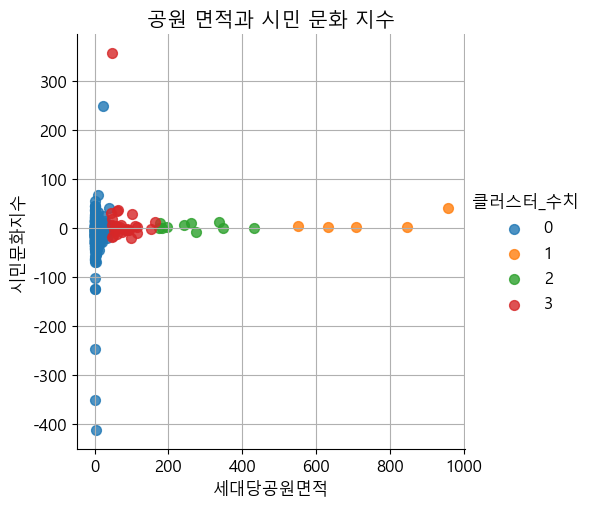

In [48]:
sb.lmplot(x='세대당공원면적', y='시민문화지수', data=tmp, 
          fit_reg=False, scatter_kws={"s": 50}, hue="클러스터_수치")
plt.title("공원 면적과 시민 문화 지수")
plt.grid()

In [49]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
3,부암동,0.00,0.710363,5.777047,1.081284,0
4,평창동,1.14,0.714284,2.630924,1.576024,0
5,무악동,2.16,0.392369,-2.638884,0.131079,0
6,교남동,2.33,0.510352,-62.819973,0.351403,0
7,가회동,4.84,2.121205,-4.591239,1.973688,0
...,...,...,...,...,...,...
420,성내제1동,1.56,0.651309,-26.750660,1.084395,0
421,성내제2동,0.18,0.487564,-19.819594,1.947349,0
422,성내제3동,0.35,0.719540,-21.968657,1.275197,0
423,길동,4.11,0.548756,-5.462606,0.837081,0


In [50]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
2,삼청동,956.51,0.715943,39.839834,2.266277,1
95,면목제4동,552.28,0.489069,3.317796,0.956309,1
148,도봉제1동,847.11,0.729134,1.451742,1.138394,1
166,중계제4동,632.00,0.452277,2.248717,0.130324,1
357,내곡동,708.16,2.190136,2.145861,0.513453,1


In [51]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
0,청운효자동,337.55,0.883757,12.240301,0.978054,2
99,면목제3.8동,274.12,0.555669,-8.835207,0.948432,2
136,번제2동,178.05,0.535838,10.408885,0.558522,2
168,상계제1동,431.88,0.823947,-0.840786,0.493372,2
191,진관동,181.39,0.688764,0.767843,0.266232,2
221,상암동,197.46,1.096987,2.757306,0.678238,2
312,사당제2동,174.93,0.582857,0.587809,0.790950,2
355,양재제1동,261.05,0.515597,11.043823,0.775810,2
377,일원본동,347.99,0.418144,0.903570,0.435691,2
388,오륜동,242.93,0.118472,6.237554,1.400214,2


In [52]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,세대당공원면적,교통약자지수,시민문화지수,접근성지수,클러스터_수치
1,사직동,60.79,0.952852,35.399526,2.354708,3
8,종로1.2.3.4가동,101.40,1.621003,28.586831,6.421615,3
10,이화동,46.74,1.120341,357.609180,2.037489,3
59,성수1가제1동,63.76,0.642011,0.171871,1.107124,3
71,능동,88.61,0.654036,-3.112073,2.762881,3
109,신내제2동,115.20,0.823848,-10.769138,0.417016,3
113,돈암제1동,47.80,0.469836,-17.430146,0.084730,3
120,정릉제4동,151.75,0.464491,-2.191784,0.377569,3
125,월곡제2동,82.79,0.874948,-4.010476,1.329427,3
137,번제3동,88.42,0.453509,-4.470952,0.127733,3
